In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
print(df.isnull().sum(),'\n')
print(df.info())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6

In [9]:
df.columns = (
    df.columns
    .str.replace(' ','_')
)

In [16]:
math_mean = df['math_score'].mean()
math_median = df['math_score'].median()

read_mean = df['reading_score'].mean()
read_median = df['reading_score'].median()

write_mean = df['writing_score'].mean()
write_median = df['writing_score'].median()

(math_mean, math_median, read_mean, read_median, write_mean, write_median)


(np.float64(66.089),
 np.float64(66.0),
 np.float64(69.169),
 np.float64(70.0),
 np.float64(68.054),
 np.float64(69.0))

In [17]:
df.groupby('gender')[['math_score','reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

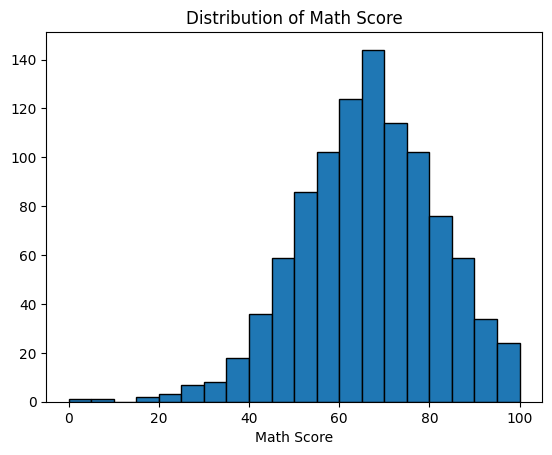

In [19]:
plt.hist(df['math_score'], bins=20, edgecolor='black')
plt.title("Distribution of Math Score")
plt.xlabel("Math Score")
plt.ylable("Frequency")
plt.show()

In [33]:
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df.nlargest(10, 'Total_score')
# df['Total_score'].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
712,female,group D,some college,standard,none,98,100,99,297,99.000000
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667


In [ ]:
df['Average_score'] = df[['math_score','reading_score','writing_score']].mean(axis=1)
df['Average_score'].head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Average_score, dtype: float64

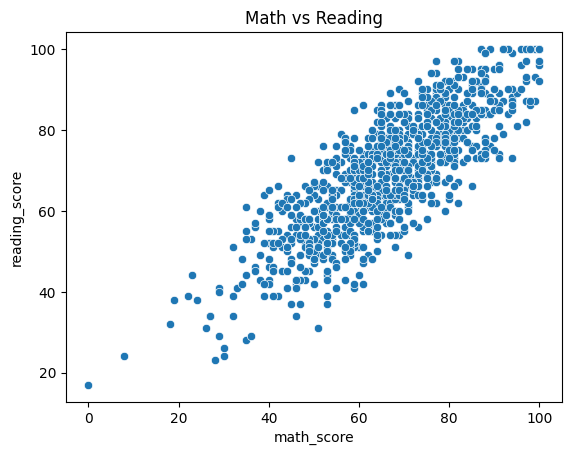

In [34]:
sns.scatterplot(x='math_score', y='reading_score', data=df)
plt.title("Math vs Reading")
plt.show()

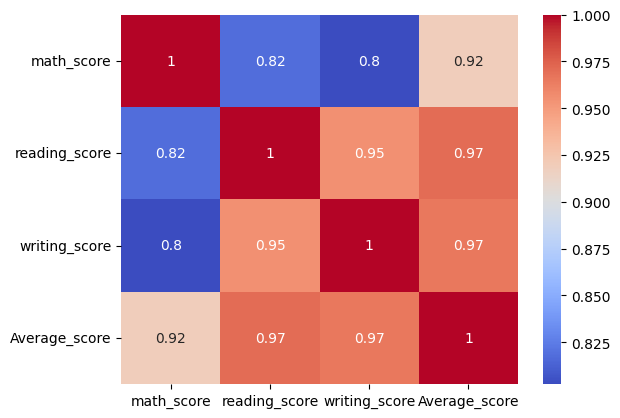

In [36]:
corr = df[['math_score','reading_score','writing_score','Average_score']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [37]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average_score'],
      dtype='object')

In [39]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score','Average_score']].mean()

,math_score,reading_score,Average_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.569069
bachelor's degree,69.389831,73.000000,71.923729
high school,62.137755,64.704082,63.096939
master's degree,69.745763,75.372881,73.598870
some college,67.128319,69.460177,68.476401
some high school,63.497207,66.938547,65.108007


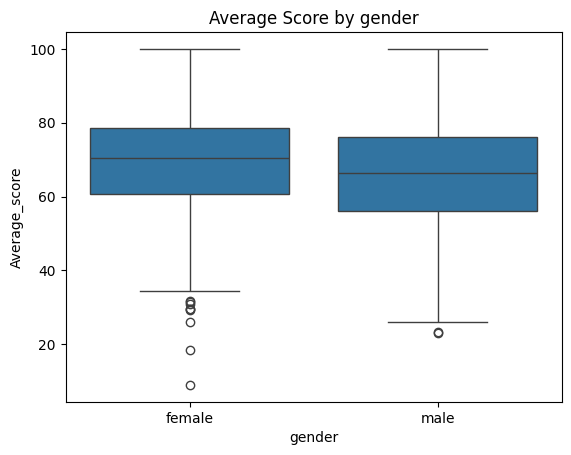

In [40]:
sns.boxplot(x='gender', y='Average_score', data=df)
plt.title("Average Score by gender")
plt.show()

In [41]:
low_math = df[df['math_score'] < 50]
low_score_count = low_math.shape[0]
low_score_count

135

In [43]:
pass_math = (df['math_score'] >= 40).mean()*100
pass_math

np.float64(96.0)

In [45]:
def per_cat(score):
    if score > 80:
        return 'High'
    elif score >=50:
        return 'Medium'
    else:
        return 'Low'
    
df['PerformanceCat'] = df['Average_score'].apply(per_cat)
df['PerformanceCat'].value_counts()

PerformanceCat
Medium    703
High      194
Low       103
Name: count, dtype: int64